### Merger Rate of Black Holes in a Primordial Black Hole Cluster

###### Code Writed by Tadeo D.
###### Dedicated to the Moon of my life.
**References:** [arXiv:2105.14523](https://arxiv.org/pdf/2105.14523.pdf).

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math
import seaborn as sns
from scipy import stats
from astropy import constants as const
import csv
from scipy import constants
from scipy.integrate import odeint
from tqdm import tqdm
from scipy import integrate
from scipy.integrate import quad, dblquad
from astropy.cosmology import Planck18 as cosmo# WMAP9 as cosmo #
import astropy.units as u
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sympy import *
from sympy import simplify
import pandas as pd

In [2]:
H0 = cosmo.H(0)  #cosmo.H(0)  <Quantity 67.66 km / (Mpc s)>
G = const.G
c = const.c
z_r = 5000 #3450
z_eq = 3411
z_0 = 0
z_init = 6.900e9
rho_c0 = (3*(H0**2))/(8*math.pi*G)
rho_eq = cosmo.critical_density(3411)
rho_crit = cosmo.critical_density(0)
Omega_DM = cosmo.Odm(0)
Omega_M = cosmo.Om(0)
Omega_R = 8.4e-5
Omega_lmb = 1-Omega_M - Omega_R
result_i=0
result_j=0

$$\rho_{i}(r) = \rho_{0,i}\left(\frac{r}{r_{0}}\right)^{-1} \left(1 + \frac{r^{2}}{r^{2}_{0}}\right)^{-2}$$

In [3]:
M = 10**6 * u.M_sun#M is the total mass of the cluster
R = 0.8*u.parsec #Scale factor that determines the core radius
v_rel = (G*M/R)**(1./2.)#The characteristic velocity of the PBHs
m_i = 0.01*u.M_sun
m_j = 0.01*u.M_sun
error=1

if m_i==m_j:
    N_i = M/(2*m_i)
    N_j = M/(2*m_j) 
if m_j>m_i:
    zetha = (m_j/m_i)
    N_i = (M/(zetha*m_i))
    N_j =  N_i - (M/(zetha*m_j))
if m_i>m_j:
    zetha = (m_i/m_j)
    N_j = (M/(zetha*m_j))
    N_i = N_j - (M/(zetha*m_i))


print("Cluster Propierities\n")
print("M =\t", M)
print("R =\t", R)
print("m_i =\t", m_i, "\t\t N_i =\t", N_i)
print("m_j =\t", m_j, "\t\t N_j =\t", N_j)
print("M_t = ", (N_i*m_i + N_j*m_j))
print("v_rel =\t", v_rel.to(u.parsec* u.s**(-1)))

Cluster Propierities

M =	 1000000.0 solMass
R =	 0.8 pc
m_i =	 0.01 solMass 		 N_i =	 50000000.0
m_j =	 0.01 solMass 		 N_j =	 50000000.0
M_t =  1000000.0 solMass
v_rel =	 2.376211020168181e-12 pc / s


In [4]:
interval = 0.1
r = np.arange(.1, R.value+interval, interval)
N_i_1_array = []
N_j_1_array = []
N_total_casc = []
def V(radius):
    return (4/3)*math.pi*(radius**3.)

print("Numbers of PBHs into Cluster by spherical regions")
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("radius \t\t n_pbh_mi(r) \t\t n_pbh_mj(r) \t\t total n_pbh(r)")

if m_i==m_j:
    for i in r:
        i=i*u.parsec
        Ni_casc = round(float(N_i*(V(i)/V(R))))
        Nj_casc = round(float(N_j*(V(i)/V(R))))
        N_i = N_i - Ni_casc
        N_j = N_j - Nj_casc
        N_i_1_array.append(Ni_casc)
        N_j_1_array.append(Nj_casc)
        result_i = result_i + Ni_casc
        result_j = result_j + Nj_casc
        print("%.2f" %i.value," \t\t ",Ni_casc," \t\t ",Nj_casc, " \t\t ", Ni_casc + Nj_casc)
        N_total_casc.append(Ni_casc + Nj_casc)
    print("\n Total numbers of PBHs into Cluster = ",result_i + result_j)
    N_i = M/(2*m_i)
    N_j = M/(2*m_j) 

    
if m_j>m_i:
    for i in r:
        i=i*u.parsec
        Ni_casc = round(float(N_i*(V(i)/V(R))))
        Nj_casc = round(float(N_j*(V(i)/V(R))))
        N_i = N_i - Ni_casc
        N_j = N_j - Nj_casc
        N_i_1_array.append(Ni_casc)
        N_j_1_array.append(Nj_casc)
        result_i = result_i + Ni_casc
        result_j = result_j + Nj_casc
        print("%.2f" %i.value," \t\t ",Ni_casc," \t\t ",Nj_casc, " \t\t ", Ni_casc + Nj_casc)
        N_total_casc.append(Ni_casc + Nj_casc)
    print("\n Total numbers of PBHs into Cluster = ",result_i + result_j)
    zetha = (m_j/m_i)
    N_i = (M/(zetha*m_i))
    N_j =  N_i - (M/(zetha*m_j))
    
if m_i>m_j:
    for i in r:
        i=i*u.parsec
        Ni_casc = round(float(N_i*(V(i)/V(R))))
        Nj_casc = round(float(N_j*(V(i)/V(R))))
        N_i = N_i - Ni_casc
        N_j = N_j - Nj_casc
        N_i_1_array.append(Ni_casc)
        N_j_1_array.append(Nj_casc)
        result_i = result_i + Ni_casc
        result_j = result_j + Nj_casc
        print("%.2f" %i.value," \t\t ",Ni_casc," \t\t ",Nj_casc, " \t\t ", Ni_casc + Nj_casc)
        N_total_casc.append(Ni_casc + Nj_casc)
    print("\n Total numbers of PBHs into Cluster = ",result_i + result_j)
    zetha = (m_i/m_j)
    N_j = (M/(zetha*m_j))
    N_i = N_j - (M/(zetha*m_i))
    
result_i=0
result_j=0

#print(N_i_1_array)

Numbers of PBHs into Cluster by spherical regions
Primordial Black holes Masses:	 m_i =  0.01 solMass 	 m_j =  0.01 solMass 

radius 		 n_pbh_mi(r) 		 n_pbh_mj(r) 		 total n_pbh(r)
0.10  		  97656  		  97656  		  195312
0.20  		  779724  		  779724  		  1559448
0.30  		  2590451  		  2590451  		  5180902
0.40  		  5816521  		  5816521  		  11633042
0.50  		  9940344  		  9940344  		  19880688
0.60  		  12983331  		  12983331  		  25966662
0.70  		  11919232  		  11919232  		  23838464
0.80  		  5872741  		  5872741  		  11745482

 Total numbers of PBHs into Cluster =  100000000


In [5]:
#Masas en cada cascaron (se podría decir que la masa es función del radio)
M_i_1_value = []
M_j_1_value = []
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("radius \t\t  Mass_mi(r) \t\t Mass_mj(r)")
for h, i, j in zip(r, N_i_1_array, N_j_1_array):
    M_i_1 = i*m_i
    M_i_1_value.append(M_i_1)
    M_j_1 = j*m_j
    M_j_1_value.append(M_j_1)
    print("{0:.2f}".format(h), " \t\t ","{0:.2f}".format(M_i_1)," \t","{0:.2f}".format(M_j_1))

Primordial Black holes Masses:	 m_i =  0.01 solMass 	 m_j =  0.01 solMass 

radius 		  Mass_mi(r) 		 Mass_mj(r)
0.10  		  976.56 solMass  	 976.56 solMass
0.20  		  7797.24 solMass  	 7797.24 solMass
0.30  		  25904.51 solMass  	 25904.51 solMass
0.40  		  58165.21 solMass  	 58165.21 solMass
0.50  		  99403.44 solMass  	 99403.44 solMass
0.60  		  129833.31 solMass  	 129833.31 solMass
0.70  		  119192.32 solMass  	 119192.32 solMass
0.80  		  58727.41 solMass  	 58727.41 solMass


In [6]:
Energy_it = G*((m_i*N_i)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
print("E_i =\t", Energy_it.to(u.parsec**2.*u.s**(-2.)))

Energy_jt = G*((m_j*N_j)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
print("E_j =\t", Energy_jt.to(u.parsec**2.*u.s**(-2.)))

E_i =	 7.057973515460882e-19 pc2 / s2
E_j =	 7.057973515460882e-19 pc2 / s2


In [7]:
Ei_array = []
Ej_array = []
for i, j in zip(N_i_1_array, N_j_1_array):
    Energy_i1 = G*((m_i*i)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
    Ei_array.append(Energy_i1.to(u.parsec**2.*u.s**(-2.)))
    #print("Ei =\t", Energy_i1.to(u.parsec**2.*u.s**(-2.)))
    Energy_j1 = G*((m_j*j)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
    Ej_array.append(Energy_j1.to(u.parsec**2.*u.s**(-2.)))
    #print("Ej =\t", Energy_j1.to(u.parsec**2.*u.s**(-2.)))
print(Ei_array,"\n",Ej_array)

[<Quantity 2.69238944e-24 pc2 / s2>, <Quantity 1.7164131e-22 pc2 / s2>, <Quantity 1.89448329e-21 pc2 / s2>, <Quantity 9.55139084e-21 pc2 / s2>, <Quantity 2.78960584e-20 pc2 / s2>, <Quantity 4.75896241e-20 pc2 / s2>, <Quantity 4.01085131e-20 pc2 / s2>, <Quantity 9.73692246e-21 pc2 / s2>] 
 [<Quantity 2.69238944e-24 pc2 / s2>, <Quantity 1.7164131e-22 pc2 / s2>, <Quantity 1.89448329e-21 pc2 / s2>, <Quantity 9.55139084e-21 pc2 / s2>, <Quantity 2.78960584e-20 pc2 / s2>, <Quantity 4.75896241e-20 pc2 / s2>, <Quantity 4.01085131e-20 pc2 / s2>, <Quantity 9.73692246e-21 pc2 / s2>]


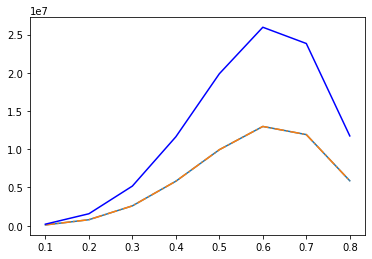

In [8]:
pl.plot(r, N_i_1_array)
pl.plot(r, N_j_1_array, "-.")
pl.plot(r, N_total_casc, "blue")

In [9]:
sigma = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_i+m_j)**(10./7.) * m_i**(2./7.) * m_j**(2./7.))/(c**(10./7.))
sigma = sigma.to(u.m**(32./7)/u.s**(18./7.))#.to(u.parsec**2)
print(sigma)
#print(sigma)
#sigma.to(u.AU**2)
#sigma.to(u.parsec**2.)

6.19832413121049e+25 m(32/7) / s(18/7)


In [10]:
def f_ij(E_ij, N_1): ## eq. 19 shapiro
    return (24. * (2.)**(1./2.) * N_1 * R**2. * E_ij**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def rho_i1(r, M_i):## eq. 20
    return ((3*M_i)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def rho_j1(r, M_j):## eq. 20
    return ((3*M_j)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def phi(r):## eq. 21
    return (G*M/R)*((1 + r**(2.)/R**(2.))**(-1./2.))

def integrant(E):
    return E**(7./2.)*((2*(a - E))**(3./2.))

In [11]:
for h, i, k, j in zip (N_i_1_array, Ei_array, N_j_1_array, Ej_array):
    print(f_ij(i, h), f_ij(j, k))
#PH_i(1.*u.parsec)
#rho_i(1*u.parsec)

2.3632596753295013e-58 kg5 pc9 s3 / (m15 solMass5) 2.3632596753295013e-58 kg5 pc9 s3 / (m15 solMass5)
3.90343730720215e-51 kg5 pc9 s3 / (m15 solMass5) 3.90343730720215e-51 kg5 pc9 s3 / (m15 solMass5)
5.793260348326518e-47 kg5 pc9 s3 / (m15 solMass5) 5.793260348326518e-47 kg5 pc9 s3 / (m15 solMass5)
3.743056609430708e-44 kg5 pc9 s3 / (m15 solMass5) 3.743056609430708e-44 kg5 pc9 s3 / (m15 solMass5)
2.7235246131646448e-42 kg5 pc9 s3 / (m15 solMass5) 2.7235246131646448e-42 kg5 pc9 s3 / (m15 solMass5)
2.306795130581951e-41 kg5 pc9 s3 / (m15 solMass5) 2.306795130581951e-41 kg5 pc9 s3 / (m15 solMass5)
1.1638745640535423e-41 kg5 pc9 s3 / (m15 solMass5) 1.1638745640535423e-41 kg5 pc9 s3 / (m15 solMass5)
4.0424697238670753e-44 kg5 pc9 s3 / (m15 solMass5) 4.0424697238670753e-44 kg5 pc9 s3 / (m15 solMass5)


In [12]:
def n_i_1(r, M_i):
    return (rho_i1(r, M_i)/m_i)

def n_j_1(r, M_j):
    return (rho_j1(r, M_j)/m_j)

print("n_i1 \t\t\t\t\t n_j1")
for h,i,j in zip(r, M_i_1_value, M_j_1_value):
    h=h*u.parsec
    print(n_i_1(h, i),"\t\t",n_j_1(h, j))#,"\t",n_i_1(h, M))

n_i1 					 n_j1
43803.30751923047 1 / pc3 		 43803.30751923047 1 / pc3
312435.22010127874 1 / pc3 		 312435.22010127874 1 / pc3
869279.8167341163 1 / pc3 		 869279.8167341163 1 / pc3
1552493.1677997832 1 / pc3 		 1552493.1677997832 1 / pc3
2032440.133565685 1 / pc3 		 2032440.133565685 1 / pc3
1983706.8541903107 1 / pc3 		 1983706.8541903107 1 / pc3
1341663.26566497 1 / pc3 		 1341663.26566497 1 / pc3
484069.0194273193 1 / pc3 		 484069.0194273193 1 / pc3


In [13]:
alfa = ((4*24*(2**(1/2))*(R**(2.)))/(math.pi*(G**(5.))*(M**(5.))*(2**(17./2.))))

def vel_i(r, N_i_1, M_i):
    return (alfa**(1./2.))*(N_i_1**(1./2.))*((phi(r)**(3))/(n_i_1(r, M_i)**(1./2.)))

def vel_j(r, N_j_1, M_j):
    return (alfa**(1./2.))*(N_j_1**(1./2.))*((phi(r)**(3))/(n_j_1(r, M_j)**(1./2.)))

print("vel_i \t\t\t\t vel_j")
for h,i,j,k,l in zip(r, N_i_1_array, N_j_1_array, M_i_1_value, M_j_1_value):
    h = h*u.parsec
    print(vel_i(h,i,k).to(u.km/u.s), "\t", vel_j(h,j,l).to(u.km/u.s))

vel_i 				 vel_j
51.64606142190773 km / s 	 51.64606142190773 km / s
51.066761653687436 km / s 	 51.066761653687436 km / s
50.1689291933113 km / s 	 50.1689291933113 km / s
49.03351757064738 km / s 	 49.03351757064738 km / s
47.743916828854765 km / s 	 47.743916828854765 km / s
46.37303780234956 km / s 	 46.37303780234956 km / s
44.97756456898562 km / s 	 44.97756456898562 km / s
43.59764734883201 km / s 	 43.59764734883201 km / s


In [14]:
betha = (3./(4*math.pi*(R**(3.))))
etha = (G*M/R)

In [15]:
def GAMMA(r1,r0): #Equation (11)
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + a)**(1./4.)) + 1./((1. + b)**(1./4.)))**(3./7.) - abs((1./((1. + a)**(1./4.)) - 1./((1. + b)**(1./4.))))**(3./7.)

In [16]:
def r_star(N_ij, Mi):
    kappa = (1-((8*24*(2**(1./2.))*N_ij*m_i)/(3*Mi*2**(17./2.))))*(1*u.M_sun)
    r_star_quad = (4.*(kappa**(2.))*(Mi*R)**(2.))/((m_i*N_ij)**(4.)) - R**(2.)
    r_star_value = (abs(r_star_quad))**(1./2.)
    return r_star_value

for i,j in zip(N_i_1_array, M_i_1_value):
    print(r_star(i,j))

0.7999990562762116 pc
0.7999999851966262 pc
0.7999999986588057 pc
0.7999999997339791 pc
0.7999999999089166 pc
0.7999999999466089 pc
0.7999999999366502 pc
0.799999999739048 pc


In [17]:
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t time to the first Merger\n")

colm1 = []
colm2 = []
colm3 = []
colm4 = []

for h,i,j,k in zip(r, N_i_1_array, N_j_1_array, M_j_1_value) :
    r0 = h*u.parsec
    colm1.append("%.2f"%r0.value)
    I, err = quad(GAMMA, h+interval, 0., args=(r0,))
    nash_rubi = (14*math.pi/3.)*sigma*(i)*(n_j_1(r0, k)/vel_j(r0, j, k))*(alfa**(-2./7.))*(betha**(9./7.))*(etha**(-12./7.))
    #I = I*units
    merger = (I*nash_rubi*(u.parsec**(3.))).to(u.yr**(-1))
    colm2.append(merger.value)
    colm3.append((merger*(cosmo.age(0).to(u.yr))).value)
    colm4.append(((merger**(-1.)).to(u.Gyr)).value)
    print("%.2f"%r0.value,"\t",merger,"\t\t", merger*(cosmo.age(0).to(u.yr)),"\t\t",(merger**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))


Primordial Black holes Masses:	 m_i =  0.01 solMass 	 m_j =  0.01 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 time to the first Merger

0.10 	 1.0507111559651467e-15 1 / yr 		 1.4486034192833511e-05 		 951736.3495407401 Gyr
0.20 	 1.252595359335207e-13 1 / yr 		 0.0017269388548984135 		 7983.424116553749 Gyr
0.30 	 1.969357915388783e-12 1 / yr 		 0.02715131169807009 		 507.7797144875943 Gyr
0.40 	 1.1938206835234598e-11 1 / yr 		 0.16459068834904772 		 83.76467369023842 Gyr
0.50 	 3.758709440665142e-11 1 / yr 		 0.5182089594203139 		 26.604876375414637 Gyr
0.60 	 6.428591735979147e-11 1 / yr 		 0.8863025691739198 		 15.55550641679828 Gyr
0.70 	 5.171168054959789e-11 1 / yr 		 0.7129430085114725 		 19.337990747387845 Gyr
0.80 	 1.1585791695585293e-11 1 / yr 		 0.159731981240011 		 86.3126168910015 Gyr


In [18]:
number_col_array = []
prob_array = []
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("Merger_Rate \t\t\t | Probability \t\t | Collision Number \t |")
print("----------------------------------------------------------------------------------")
for i,j in zip(colm2, N_j_1_array):
    GAMMA_value = i*(1/u.yr)
    Prob = GAMMA_value*(1e9*u.yr) #integration dt
    prob_array.append(Prob)
    Num_Col = j*Prob #numero de choques
    number_col_array.append(Num_Col)
    print(GAMMA_value, " \t | " , "%.4f" %Prob, " \t\t |" , Num_Col, " \t | ")

Primordial Black holes Masses:	 m_i =  0.01 solMass 	 m_j =  0.01 solMass 

Merger_Rate 			 | Probability 		 | Collision Number 	 |
----------------------------------------------------------------------------------
1.0507111559651467e-15 1 / yr  	 |  0.0000  		 | 0.10260824864693237  	 | 
1.252595359335207e-13 1 / yr  	 |  0.0001  		 | 97.66786639622849  	 | 
1.969357915388783e-12 1 / yr  	 |  0.0020  		 | 5101.525181276787  	 | 
1.1938206835234598e-11 1 / yr  	 |  0.0119  		 | 69438.83075948559  	 | 
3.758709440665142e-11 1 / yr  	 |  0.0376  		 | 373628.64836259105  	 | 
6.428591735979147e-11 1 / yr  	 |  0.0643  		 | 834645.3437208188  	 | 
5.171168054959789e-11 1 / yr  	 |  0.0517  		 | 616363.5175805448  	 | 
1.1585791695585293e-11 1 / yr  	 |  0.0116  		 | 68040.35390812326  	 | 


In [19]:
print(error)

1


## SECOND GENERATION

In [20]:
Ni_2_values = []
Nj_2_values = []
print("PBHs con", 2*m_i," \t PBHs con", m_i)# \t  Number_pbhs at cluster")
for h, i, j in zip(number_col_array, N_i_1_array, N_j_1_array):
    number_binarys = round(float(h))
    N_j_2 = number_binarys #PBHs de (m_i+m_j) masas solares
    N_i_2 = i + (j - 2*round(float(h))) #PBHs
    Ni_2_values.append(N_i_2)
    Nj_2_values.append(N_j_2)
        #Nt = (N_i + N_j - N_j_2) #Numero de agujeros negros totales en el cluster
    print(N_j_2,"\t\t\t", N_i_2)

PBHs con 0.02 solMass  	 PBHs con 0.01 solMass
0 			 195312
98 			 1559252
5102 			 5170698
69439 			 11494164
373629 			 19133430
834645 			 24297372
616364 			 22605736
68040 			 11609402


In [21]:
Ei_2_array = []
Ej_2_array = []
m_j_2 = 2.*m_j
for i,j in zip (Ni_2_values, Nj_2_values):
    Energy_mi2 = G*(m_i*i)**(2.)/((2*R)*(1*u.M_sun)) #According to the virial theorem, the total energy
    Energy_mj2 = G*((m_j_2)*j)**(2.)/((2*R)*(1*u.M_sun)) #According to the virial theorem, the total energy
    Ei_2_array.append(Energy_mi2.to(u.parsec**2.*u.s**(-2.)))
    Ej_2_array.append(Energy_mj2.to(u.parsec**2.*u.s**(-2.)))
    
print("M =\t", M)
print("R =\t", R)
print("v_rel =\t", v_rel.to(u.parsec* u.s**(-1)))
print("m_i_2 =\t", m_i)
print("m_j_2 =\t", m_j_2)
#print("E =\t", Energy.to(u.parsec**2.*u.s**(-2.)))
#print("Energy to m_i = \t", Energy_mi.to(u.parsec**2.*u.s**(-2.)))
#print("Energy to m_j_2 = \t", Energy_mj2.to(u.parsec**2.*u.s**(-2.)))
print("\n")
#print(Ei_2_array,"\n",Ej_2_array)

M =	 1000000.0 solMass
R =	 0.8 pc
v_rel =	 2.376211020168181e-12 pc / s
m_i_2 =	 0.01 solMass
m_j_2 =	 0.02 solMass




In [22]:
print("M_i \t\t\t M_j")# \t\t\t  vel_rel_i \t\t\t  vel_rel_j")
Mi_array = []
Mj_array = []
for i,j in zip(Ni_2_values, Nj_2_values):
    Mi = i*u.M_sun
    Mj = j*2*u.M_sun
    Mi_array.append(Mi)
    Mj_array.append(Mj)
    print(Mi,"\t\t",Mj,"\t ")#, v_ri.to(u.km/u.s)," \t ",v_rj.to(u.km/u.s))

M_i 			 M_j
195312.0 solMass 		 0.0 solMass 	 
1559252.0 solMass 		 196.0 solMass 	 
5170698.0 solMass 		 10204.0 solMass 	 
11494164.0 solMass 		 138878.0 solMass 	 
19133430.0 solMass 		 747258.0 solMass 	 
24297372.0 solMass 		 1669290.0 solMass 	 
22605736.0 solMass 		 1232728.0 solMass 	 
11609402.0 solMass 		 136080.0 solMass 	 


In [23]:
sigma_2 = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_i+m_j_2)**(10./7.) * m_i**(2./7.) * m_j_2**(2./7.))/(c**(10./7.))
sigma_2 = sigma.to(u.parsec**(32./7)/u.yr**(18./7.))#.to(u.parsec**2)
#print(m_i, m_j_2)
print(sigma_2)

4.963594304558011e-31 pc(32/7) / yr(18/7)


In [24]:
def f_i2(E, Ni_2): ## eq. 19 shapiro
    return (24. * (2.)**(1./2.) * Ni_2 * R**2. * E**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def f_j2(E, Nj_2):
    return (24. * (2.)**(1./2.) * Nj_2 * R**2. * E**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def rho_i2(r, M_i):## eq. 20
    return ((3*M_i)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def rho_j2(r, M_j):## eq. 20
    return ((3*M_j)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

#def integrant(E):
#    return E**(7./2.)*((2*(a - E))**(3./2.))

In [25]:
print("N_i \t\t f_i2 \t\t\t\t\t\t N_j \t\t f_j2")
for h,i,j,k,l in zip (r, Ni_2_values, Nj_2_values, Ei_2_array, Ej_2_array):
    h = h*u.parsec
    print(i,"\t",f_i2(k, i).to(u.s**3./(u.m**6.))," \t\t ",j,"\t",f_j2(l, j).to(u.s**3./(u.m**6.)))
print("\n")
print("M_i \t\t\t rho_i2 \t\t\t\t M_j \t\t\t  rho_j2")
for h,k,l in zip (r, Mi_array, Mj_array):
    h = h*u.parsec
    print(k,"\t",rho_i2(h,k),"\t",l,"\t",rho_j2(h,l))

N_i 		 f_i2 						 N_j 		 f_j2
195312 	 4.936018344957509e-59 s3 / m6  		  0 	 0.0 s3 / m6
1559252 	 8.144713751568196e-52 s3 / m6  		  98 	 2.538422581040475e-83 s3 / m6
5170698 	 1.1910739656879121e-47 s3 / m6  		  5102 	 1.3698687267481804e-69 s3 / m6
11494164 	 7.101734997656384e-45 s3 / m6  		  69439 	 1.6128091548800765e-60 s3 / m6
19133430 	 4.186855785167441e-43 s3 / m6  		  373629 	 1.1331305204971562e-54 s3 / m6
24297372 	 2.8315208935063837e-42 s3 / m6  		  834645 	 7.026995660683887e-52 s3 / m6
22605736 	 1.5896245396741333e-42 s3 / m6  		  616364 	 6.215176070858545e-53 s3 / m6
11609402 	 7.691732034232211e-45 s3 / m6  		  68040 	 1.370470704661881e-60 s3 / m6


M_i 			 rho_i2 				 M_j 			  rho_j2
195312.0 solMass 	 87606.61503846092 solMass / pc3 	 0.0 solMass 	 0.0 solMass / pc3
1559252.0 solMass 	 624791.9030494882 solMass / pc3 	 196.0 solMass 	 78.53715306935612 solMass / pc3
5170698.0 solMass 	 1735135.4686220516 solMass / pc3 	 10204.0 solMass 	 3424.164846181195 so

In [26]:
def n_i_2(r, M_i):
    return (rho_i2(r, M_i)/m_i)

def n_j_2(r, M_j):
    return (rho_j2(r, M_j)/m_j_2)

In [27]:
alfa_2 = ((4*24*(2**(1/2))*(R**(2.)))/(math.pi*(G**(5.))*(M**(5.))*(2**(17./2.))))

def vel_i2(r, N_i_2, M_i):
    return (alfa_2**(1./2.))*(N_i_2**(1./2.))*((phi(r)**(3))/(n_i_2(r, M_i)**(1./2.)))

def vel_j2(r, N_j_2, M_j):
    return (alfa_2**(1./2.))*(N_j_2**(1./2.))*((phi(r)**(3))/(n_j_2(r, M_j)**(1./2.)))


for h,i,j,k,l in zip(r, Ni_2_values, Nj_2_values, Mi_array, Mj_array):
    h = h*u.parsec
    print(vel_i2(h,i,k).to(u.km/u.s), "\t",vel_j2(h,j,l).to(u.km/u.s))

#print("\n")
#for h in r:
    #h = h*u.parsec
    #print("r = ","%.2f"%h.value)
    #print("vel_rel = ")
    #for i,j,k,l in zip(Ni_2_values, Nj_2_values, Mi_array, Mj_array):
    #    print(vel_i2(h,i,k).to(u.km/u.s), "\t", vel_j2(h,j,l).to(u.km/u.s))

5.164606142190774 km / s 	 nan km / s
5.106676165368744 km / s 	 5.106676165368746 km / s
5.01689291933113 km / s 	 5.016892919331132 km / s
4.903351757064738 km / s 	 4.903351757064738 km / s
4.774391682885477 km / s 	 4.774391682885477 km / s
4.637303780234957 km / s 	 4.637303780234956 km / s
4.4977564568985615 km / s 	 4.497756456898562 km / s
4.3597647348832 km / s 	 4.359764734883201 km / s


/home/thaddaios/.local/lib/python3.8/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/thaddaios/.local/lib/python3.8/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [28]:
#CONSTANTS SECOND GENERATION
betha_2 = (3./(4*math.pi*(R**(3.))))
etha_2 = (G*M/R)
#zetha2 = alfa**(-1./2.) * betha**(3./2.) * etha**(-3.) * alfa**(3./14.) * etha**(9./7.) * betha**(-3./14.)
#print(zetha)

In [29]:
def GAMMA_2(r1,r0): #Equation (11)
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + a)**(1./4.)) + 1./((1. + b)**(1./4.)))**(3./7.) - abs((1./((1. + a)**(1./4.)) - 1./((1. + b)**(1./4.))))**(3./7.)



colm1_2gnd = []
colm2_2gnd = []
colm3_2gnd = []
colm4_2gnd = []
print("Black holes Masses:\t", m_i, m_j_2, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t time to the first Merger\n")

for h,i,j,k in zip(r, Ni_2_values, Nj_2_values, Mj_array) :
    r0 = h*u.parsec
    colm1_2gnd.append("%.2f"%r0.value)
    I, err = quad(GAMMA_2, h+interval, 0., args=(r0,))
    nash_rubi = (14*math.pi/3.)*sigma_2*(i)*(n_j_2(r0, k)/vel_j2(r0, j, k))*(alfa_2**(-2./7.))*(betha_2**(9./7.))*(etha_2**(-12./7.))
    #I = I*units
    merger2 = (I*nash_rubi*(u.parsec**(3.))).to(u.yr**(-1))
    colm2_2gnd.append(merger2.value)
    colm3_2gnd.append((merger2*(cosmo.age(0).to(u.yr))).value)
    colm4_2gnd.append(((merger2**(-1.)).to(u.Gyr)).value)
    #print("%.2f"%r0.value,"\t",merger*u.parsec**(3))
    print("%.2f"%r0.value,"\t",merger2,"\t\t", merger2*(cosmo.age(0).to(u.yr)),"\t\t",(merger2**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))

Black holes Masses:	 0.01 solMass 0.02 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 time to the first Merger

0.10 	 nan 1 / yr 		 nan 		 nan Gyr
0.20 	 3.1482657138608815e-14 1 / yr 		 0.0004340477829724969 		 31763.519692677026 Gyr
0.30 	 7.74218450441545e-12 1 / yr 		 0.10674060974937268 		 129.16251213461646 Gyr
0.40 	 2.816393578565641e-10 1 / yr 		 3.8829295233001164 		 3.550640108011073 Gyr
0.50 	 2.7193764741299444e-09 1 / yr 		 37.49173154181312 		 0.36773135662282536 Gyr
0.60 	 7.734009232106512e-09 1 / yr 		 106.62789820773666 		 0.129299044000188 Gyr
0.70 	 5.071635370291485e-09 1 / yr 		 69.92205514382424 		 0.19717505833676022 Gyr
0.80 	 2.653494395694931e-10 1 / yr 		 3.6583422882971575 		 3.7686154590053595 Gyr


In [30]:
number_col_array_2 = []
prob2_array = []
print("Black holes Masses:\t", m_i, m_j_2)
print("Merger_Rate \t\t\t | Probability \t\t | Collision Number \t |")
print("----------------------------------------------------------------------------------")
for i,j in zip(colm2_2gnd, Nj_2_values):
    GAMMA_value_2 = i*(1/u.yr)
    Prob_2 = GAMMA_value_2*(1e6*u.yr) #integration dt
    prob2_array.append(Prob_2)
    Num_Col_2 = j*Prob_2 #numero de choques second generation
    number_col_array_2.append(Num_Col_2)
    print(GAMMA_value_2, " \t | " , "%.4f" %Prob_2, " \t\t |" , Num_Col_2, " \t | ")

Black holes Masses:	 0.01 solMass 0.02 solMass
Merger_Rate 			 | Probability 		 | Collision Number 	 |
----------------------------------------------------------------------------------
nan 1 / yr  	 |  nan  		 | nan  	 | 
3.1482657138608815e-14 1 / yr  	 |  0.0000  		 | 3.085300399583664e-06  	 | 
7.74218450441545e-12 1 / yr  	 |  0.0000  		 | 0.03950062534152762  	 | 
2.816393578565641e-10 1 / yr  	 |  0.0003  		 | 19.556755370201955  	 | 
2.7193764741299444e-09 1 / yr  	 |  0.0027  		 | 1016.0379126526971  	 | 
7.734009232106512e-09 1 / yr  	 |  0.0077  		 | 6455.15213553154  	 | 
5.071635370291485e-09 1 / yr  	 |  0.0051  		 | 3125.973463374341  	 | 
2.653494395694931e-10 1 / yr  	 |  0.0003  		 | 18.05437586830831  	 | 


In [31]:
print("Merger_Rate\n")
print("1st Generation \t\t|\t 2nd Generation")
print("-----------------------------------------------------------------")
for a,b in zip(colm2, colm2_2gnd):
    print(a, "\t|\t", b, " \t|")
print(4*"\n")
print("Probabilities\n")
print("1st Generation \t|\t 2nd Generation |\t TOTAL % \t\t|")
for c,d in zip(prob_array, prob2_array):
    print("%.4f" %c, "\t\t|\t", "%.4f" %d, "\t|\t", "%.2f" %(100.*(c + d)),"\t|")

Merger_Rate

1st Generation 		|	 2nd Generation
-----------------------------------------------------------------
1.0507111559651467e-15 	|	 nan  	|
1.252595359335207e-13 	|	 3.1482657138608815e-14  	|
1.969357915388783e-12 	|	 7.74218450441545e-12  	|
1.1938206835234598e-11 	|	 2.816393578565641e-10  	|
3.758709440665142e-11 	|	 2.7193764741299444e-09  	|
6.428591735979147e-11 	|	 7.734009232106512e-09  	|
5.171168054959789e-11 	|	 5.071635370291485e-09  	|
1.1585791695585293e-11 	|	 2.653494395694931e-10  	|





Probabilities

1st Generation 	|	 2nd Generation |	 TOTAL % 		|
0.0000 		|	 nan 	|	 nan 	|
0.0001 		|	 0.0000 	|	 0.01 	|
0.0020 		|	 0.0000 	|	 0.20 	|
0.0119 		|	 0.0003 	|	 1.22 	|
0.0376 		|	 0.0027 	|	 4.03 	|
0.0643 		|	 0.0077 	|	 7.20 	|
0.0517 		|	 0.0051 	|	 5.68 	|
0.0116 		|	 0.0003 	|	 1.19 	|


In [32]:
##f = open("MR_T0.1.txt", "w")
#f.write("Mpbh = 0.1 u.Solar Mass")
#f.write("\n")
#f.write("radius \t merger_rate \t Number_Mergers at Universe's time \t time to the first Merger")
#f.write("\n")
#for i in range(len(r)):
#    print(colm1[i],"\t ",colm2[i],"\t ",colm3[i],"\t ",colm4[i], file=f)
#f.close()

In [33]:
#read_file = pd.read_csv (r"MR_T0.1.txt")
#read_file.to_csv (r"MR_T0.1.csv", index=None)